## Besrivning av det projekt jag har valt

In [9]:

from pyfiglet import Figlet

f_f = Figlet(font='slant')
print(f_f.renderText('Its all about AI and crypto now'))

    ______                ____         __                __     ___    ____
   /  _/ /______   ____ _/ / /  ____ _/ /_  ____  __  __/ /_   /   |  /  _/
   / // __/ ___/  / __ `/ / /  / __ `/ __ \/ __ \/ / / / __/  / /| |  / /  
 _/ // /_(__  )  / /_/ / / /  / /_/ / /_/ / /_/ / /_/ / /_   / ___ |_/ /   
/___/\__/____/   \__,_/_/_/   \__,_/_.___/\____/\__,_/\__/  /_/  |_/___/   
                                                                           
                   __                         __                              
  ____ _____  ____/ /  ____________  ______  / /_____     ____  ____ _      __
 / __ `/ __ \/ __  /  / ___/ ___/ / / / __ \/ __/ __ \   / __ \/ __ \ | /| / /
/ /_/ / / / / /_/ /  / /__/ /  / /_/ / /_/ / /_/ /_/ /  / / / / /_/ / |/ |/ / 
\__,_/_/ /_/\__,_/   \___/_/   \__, / .___/\__/\____/  /_/ /_/\____/|__/|__/  
                              /____/_/                                        



Att kunna förutsäga morgondagens, eller kanske till och med nästa timmes, börspriser är många människors dröm. Jag förstår att det inte är realistiskt möjligt men skam den som ger sig =). Krypo har intresserat mig i många år och jag har följt Ethereum under flera år tillbaka. När vi skulle välja ett projekt så kändes det naturligt att välja just krypto och Ethereum. I första han handlar det då om huruvida det är möjligt att bygga en fungerande modell på historiska data och att testa det med olika maskininlärningstekniker. I och med att jag använder historiska data har jag möjlighet att träna modellerna på en bestämd del av min data  och sedan testa modellen på en annan del av datan. Jag har i och med det färdiga svar.  Projektet är ett regressionsproblem med en tidsberoende förutsägelse, en Time Series Prediction.

Steg 1. Hitta historiska data genom API:er. Det har varit en utmaning på så sätt att dom flesta kryptowebsiderna inte gärna lämnar ut data , utan att man betalar en ganska hög summa pengar. Jag bestämnde mig snabbt för att inte lägga ut några pengar vilket gjorde att jag fick jobba ganska hårt på att hitta ett lämpligt API. Jag landade i en kryptosida som heter CoinGecko. Där har jag lyckats få ner data från 2018 och framåt. Har alltid tyckt det varit instressant med API:er. Att lära sig att få ut den info man är instresserad av, då alla API:er är olika byggda. Postman API("https://www.postman.com/") har jag tyckt varit ett bra hjälpmedel här. 

Steg 2. I kod få ner den informationen jag önskar från API.et och spara datan i en csv-fil. 

Importerar dom 5 csv-filerna som jag redan har laddat nerfrån körning av kod i filen ethereum.py. Observera att filen ethereum.py inte gå att köra igen då API:et med min API-key inte längre är "valid" för att hämta datan igen. Jag måste uppgradera till en högre "pay-plan" för att ladda ner nu.

Sedan fortsätter jag att undersöka datan i den nerladdade csv-filen.

In [2]:
# Lägger på bibliotek som behövs här efterhand
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:

# Anger sökvägarna till CSV-filerna
file_paths = ['./src/LSTM/csv/prices_2018.csv', './src/LSTM/csv/prices_2019.csv', "./src/LSTM/csv/prices_2020.csv", './src/LSTM/csv/prices_2021.csv', './src/LSTM/csv/prices_2022.csv']

# Skapar en tom DataFrame för att hålla den sammanslagna datan
combined_data = pd.DataFrame()

# Loopar igenom varje sökväg och lägg till dess innehåll till den sammanslagna DataFramen
for file_path in file_paths:
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)

 # Skriv den sammanslagna datan till en ny CSV-fil
combined_data.to_csv('sammanslagen_data.csv', index=False)

print("Sammanslagen data har sparats till csv-fil 'sammanslagen_data.csv'")

Sammanslagen data har sparats till csv-fil 'sammanslagen_data.csv'


In [4]:
import pandas as pd
# Läs in data från CSV-filen
data = pd.read_csv("sammanslagen_data.csv")
# Välj endast kolumnerna 'Date' och 'Price'. 
# I detta fall har jag redan tidigare vid nerladdningen valt att bara ladda ner daum och pris.
# data = data.loc[:,['Date','Price']]
# Skriver ut de första fem raderna av den nya dataramen
print(data.head(5))


         Date  Price
0  2018-01-01   6345
1  2018-01-02   7155
2  2018-01-03   7879
3  2018-01-04   7959
4  2018-01-05   8199


In [5]:
data.head

<bound method NDFrame.head of             Date  Price
0     2018-01-01   6345
1     2018-01-02   7155
2     2018-01-03   7879
3     2018-01-04   7959
4     2018-01-05   8199
...          ...    ...
1820  2022-12-27  12867
1821  2022-12-28  12698
1822  2022-12-29  12438
1823  2022-12-30  12567
1824  2022-12-31  12503

[1825 rows x 2 columns]>

Ovan kan ses att datasettet har 1825 rader och 2 kolumner.

För att undersöka om det finns NaN-värden i min DataFrame körs nedan kod. 

In [6]:
import pandas as pd

# Läs in CSV-filen till en DataFrame
df = pd.read_csv('sammanslagen_data.csv')

# Undersök om det finns NaN-värden i DataFrame
nan_values = df.isna().sum().sum()

if nan_values > 0:
    print("Det finns NaN-värden i DataFrame.")
    # För att se exakt var NaN-värdena finns, kan du använda:
    print(df[df.isna().any(axis=1)])
else:
    print("Det finns inga NaN-värden i DataFrame.")


Det finns inga NaN-värden i DataFrame.


Undersöka vilka datatyper som finns, se nedan.

In [7]:
print(df.dtypes)

Date     object
Price     int64
dtype: object


För att få en överblick över min data väljer jag att plotta en kurva med priset över datum.

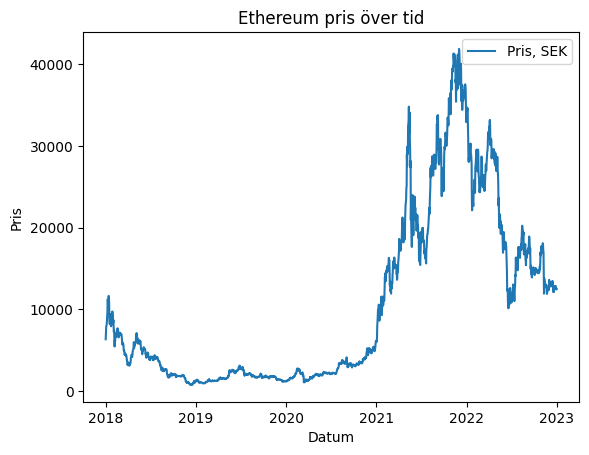

In [8]:
# Konvertera datumkolumnen till pandas datetime-objekt
df['Date'] = pd.to_datetime(df['Date'])
# Plotta datan
plt.plot(df['Date'], df['Price'], label='Pris, SEK')
plt.xlabel('Datum')
plt.ylabel('Pris')
plt.title('Ethereum pris över tid')

# Ange format för x-axeln
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.legend()
plt.show()

Efter handledningsmöte med Raphael Korsoski har jag beslutat att gå vidare med detta projekt. Jag fick tips av Raphael att titta på ett exempel i "https://www.statlearning.com/" och försöka applicera det exemplet på min data. Exemplet går igenom Logistic Regression, LDA, QDA, and KNN
Jag har även läst en del om LSTM, Neutral Network som jag kan tänka mig att prova.